### Basic Operations on Images

#### Accessing and Modifying pixel values

In [1]:
import cv2 as cv
import numpy as np

In [2]:
img = cv.imread('messi5.jpg')

In [3]:
px = img[100,100]
px

array([157, 166, 200], dtype=uint8)

In [4]:
blue = img[100,100,0]
blue

157

In [5]:
img[100,100] = [255,255,255]
img[100,100]

array([255, 255, 255], dtype=uint8)

#### Accessing Image Properties

In [6]:
img.shape

(342, 548, 3)

In [7]:
img.size

562248

#### Image ROI (感兴趣区域)

In [8]:
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball

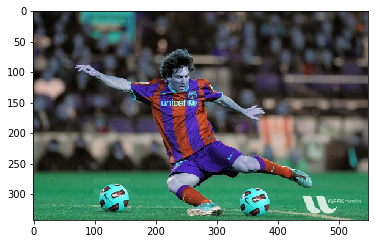

In [16]:
plt.imshow(img)

In [11]:
cv.imshow("Display window", img)
cv.waitKey(0)

-1

#### Splitting and Merging Image Channels

In [13]:
b,g,r = cv.split(img)  # cv.split() is a costly operation (in terms of time). So use it only if necessary. Otherwise go for Numpy indexing.
img = cv.merge((b,g,r))

#### Making Borders for Images (Padding)

`cv.copyMakeBorder()`
- src - input image
- top, bottom, left, right - border width in number of pixels in corresponding directions
- borderType - Flag defining what kind of border to be added. It can be following types:
    - cv.BORDER_CONSTANT
    - cv.BORDER_REFLECT
    - cv.BORDER_REFLECT_101 or cv.BORDER_DEFAULT 
    - cv.BORDER_REPLICATE
    - cv.BORDER_WRAP
- value - Color of border if border type is cv.BORDER_CONSTANT

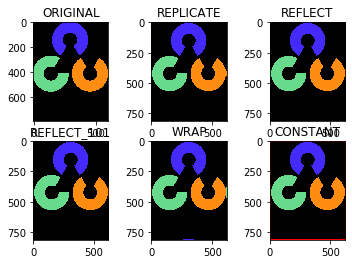

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
BLUE = [255,0,0]
img1 = cv.imread('opencv-logo.png')
replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

### Arithmetic Operations on Images

#### Image Addition
There is a difference between OpenCV addition and Numpy addition. OpenCV addition is a saturated operation while Numpy addition is a modulo operation.

In [17]:
x = np.uint8([250])
y = np.uint8([10])
cv.add(x,y)

array([[255]], dtype=uint8)

In [18]:
x+y

array([4], dtype=uint8)

#### Image Blending

$g(x)=(1−α)f0(x)+αf1(x)$

$dst=α⋅img1+β⋅img2+γ$

In [21]:
img1 = cv.imread('data/ml.png')
img2 = cv.imread('data/opencv-logo.png')
dst = cv.addWeighted(img1,0.7,img2,0.3,0)
cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-c2l3r8zm\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


In [25]:
img1.shape

(380, 308, 3)

In [26]:
img2.shape

(794, 600, 3)

#### Bitwise Operations

In [28]:
# Load two images
img1 = cv.imread('data/messi5.jpg')
img2 = cv.imread('data/opencv-logo-white.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()

`cv.cvtColor` \
Converts an image from one color space to another.**Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR.** \
- src: input image
- dst: output image of the same size and depth as src
- code: color space conversion code
- dstCn: number of channels in the destination image; if the parameter is 0, the number of the channels is derived automatically from src and code

In [23]:
img2

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

### Performance Measurement and Improvement Techniques (性能度量和改进技巧)

#### Measuring Performance with OpenCV

In [33]:
e1 = cv.getTickCount()
# your code execution
e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()

In [36]:
img1 = cv.imread('data/messi5.jpg')
e1 = cv.getTickCount()
for i in range(5,49,2):
    img1 = cv.medianBlur(img1,i)
e2 = cv.getTickCount()
t = (e2 - e1)/cv.getTickFrequency()
t

0.3035385

In [37]:
import time
img1 = cv.imread('data/messi5.jpg')
e1 = time.time()
for i in range(5,49,2):
    img1 = cv.medianBlur(img1,i)
e2 = time.time()
t = e2 - e1
t

0.3017082214355469

#### Default Optimization in OpenCV

In [38]:
cv.useOptimized()

True

In [39]:
%timeit res = cv.medianBlur(img,49)

15.4 ms ± 162 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [40]:
cv.setUseOptimized(False)

In [41]:
cv.useOptimized()

False

In [42]:
%timeit res = cv.medianBlur(img,49)

15.9 ms ± 247 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Measuring Performance in IPython

In [43]:
x = 5

In [44]:
%timeit y=x**2

239 ns ± 6.08 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [45]:
%timeit y=x*x

38.6 ns ± 2.16 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [46]:
z = np.uint8([5])

In [47]:
%timeit y=z*z

417 ns ± 8.98 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [48]:
%timeit y=np.square(z)

394 ns ± 11.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Python scalar operations are faster than Numpy scalar operations. So for operations including one or two elements, Python scalar is better than Numpy arrays. Numpy has the advantage when the size of the array is a little bit bigger.

Normally, OpenCV functions are faster than Numpy functions. So for same operation, OpenCV functions are preferred. But, there can be exceptions, especially when Numpy works with views instead of copies.

#### Additional Resources

- https://wiki.python.org/moin/PythonSpeed/PerformanceTips
- http://scipy-lectures.org/advanced/advanced_numpy/index.html#advanced-numpy
- https://pynash.org/2013/03/06/timing-and-profiling/